# 문서 임베딩 실습

- input.txt로 문서 임베딩 실습.(전체, 문장, 문단)
- FAISS 활용해 유사 단어 검색.
- 임베딩 벡터 시각화.
- t-SNE 활용 고차원 임베딩 시각화.

[임베딩할 input.txt](./input.txt)

## 문서 임베딩 개념

- 텍스트를 벡터 형태로 변환해 컴퓨터가 이해하기 쉽게 만듬.
- 변환된 벡터들은 문서 간 유사도 계산, 검색에 활용.

## 단위 임베딩

- 임베딩 시에 임베딩할 텍스트의 길이를 설정하는 건 중요한 부분.

1. __전체 문서 임베딩__

- 전체 문서를 하나의 벡터로 임베딩. 전체 맥락 이해 유리, 길이가 너무 길면 중요 정보 손실 가능성.

In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np

# 모델 불러오기
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

# input.txt 파일 불러오기
with open('input.txt', 'r', encoding='utf-8') as file:
    document = file.read()

# 전체 문서 임베딩
doc_embedding = model.encode(document)

c:\Users\By the book\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


2. __문장 단위 임베딩__

- 문장 단위로 나누어 임베딩. 세밀하고 문장별 유사도 계산에 유리. 특히 검색 시 특정 문장과 유사한 문장 찾는 데 유용.

In [ ]:
'''
실행 시 punkt 다운 받으라는 오류가 발생 시 아래 코드 추가.

import nltk
nltk.download('punkt_tab')
'''

from nltk.tokenize import sent_tokenize

# 문장으로 나누기
sentences = sent_tokenize(document)

# 각 문장을 임베딩
sentence_embeddings = model.encode(sentences)

3. __문단 단위 임베딩__

- 문서 내 주제별 정보 분석 시 유리.

- 문단의 벡터를 시각화 한 후, PCA 혹은 t-SNE 같은 차원 축소 방법을 사용해 벡터 간의 관계를 쉽게 확인 가능.

In [4]:
paragraphs = document.split('\n\n')  # 두 줄 개행 기준으로 문단 나누기

# 각 문단을 임베딩
paragraph_embeddings = model.encode(paragraphs)

## FAISS 유사도 검색

- FAISS는 벡터 가나 유사도를 빠르게 계산할 수 있도록 돕는 라이브러리.

1. __FAISS 초기화 및 인덱싱__

In [5]:
import faiss

# 문장 임베딩을 사용해 인덱스 생성
dimension = sentence_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 거리 기반 인덱스

# 인덱스에 벡터 추가
index.add(np.array(sentence_embeddings))

2. __유사 문장 검색하기__

- 특정 문장과 유사한 문장을 찾기 위해 검색할 문장을 입력 후, 인덱스 활용해 유사도 계산.

In [6]:
query = "다양한 노래가 오랜 시간 동안 수많은 사랑을 받았다."
query_vec = model.encode(query)

# 유사한 문장 3개 찾기
D, I = index.search(np.array([query_vec]), k=3)

# 결과 출력
for idx in I[0]:
    print(f"유사 문장: {sentences[idx]}")

유사 문장: 밴드의 정체성을 담은 기념비적인 데뷔 앨범 '하이브리드 띠어리(Hybrid Theory, 2000)가 큰 성공을 거두며 이후 수많은 밴드의 출현과 성공에 영향을 끼쳤다.
유사 문장: 공연이 열리는 인스파이어 아레나는 지난 3월 '인스파이어 콘서트 시리즈 #1: 마룬 파이브'를 비롯해 대형 K팝 공연 및 다양한 콘서트를 성공적으로 개최하며 선진적인 라이브 음악 공연장의 입지를 다지고 있다.
유사 문장: 1996년 결성된 린킨 파크는 전 세계 통산 1억 장 이상의 앨범 판매와 함께 그래미 어워드 2회 수상을 비롯해 아메리칸 뮤직 어워드 6회, 빌보드 뮤직 어워드 2회, MTV 비디오 뮤직 어워드 4회, MTV 유럽 뮤직 어워드 10회 수상 기록을 세웠다.


3. __유사도에 대한 실험__

- __다양한 쿼리 테스트__ :  
    다양한 쿼리를 사용하여 유사 문장 검색 결과를 비교, 예로 간단한 문장과 복잡한 문장을 각각 입력해 보고 결과가 어떻게 달라지는지 관찰.

- __유사도 점수 분석__ :  
    검색 결과로 반환된 유사도 점수(D)를 분석해, 높은 유사도와 낮은 유사도 간 차이를 확인. D 값을 출력해 얼마나 유사한지 정량적 평가 가능.

In [7]:
# 유사도 점수와 함께 결과 출력
for idx, score in zip(I[0], D[0]):
    print(f"유사 문장: {sentences[idx]}, 유사도 점수: {score}")

유사 문장: 밴드의 정체성을 담은 기념비적인 데뷔 앨범 '하이브리드 띠어리(Hybrid Theory, 2000)가 큰 성공을 거두며 이후 수많은 밴드의 출현과 성공에 영향을 끼쳤다., 유사도 점수: 185.4293212890625
유사 문장: 공연이 열리는 인스파이어 아레나는 지난 3월 '인스파이어 콘서트 시리즈 #1: 마룬 파이브'를 비롯해 대형 K팝 공연 및 다양한 콘서트를 성공적으로 개최하며 선진적인 라이브 음악 공연장의 입지를 다지고 있다., 유사도 점수: 208.574951171875
유사 문장: 1996년 결성된 린킨 파크는 전 세계 통산 1억 장 이상의 앨범 판매와 함께 그래미 어워드 2회 수상을 비롯해 아메리칸 뮤직 어워드 6회, 빌보드 뮤직 어워드 2회, MTV 비디오 뮤직 어워드 4회, MTV 유럽 뮤직 어워드 10회 수상 기록을 세웠다., 유사도 점수: 229.20407104492188


## 임베딩 벡터 시각화

- 고차원에 위치한 벡터들을 PCA나 t-SNE 등 차원 축소 기법 사용해 시각화.

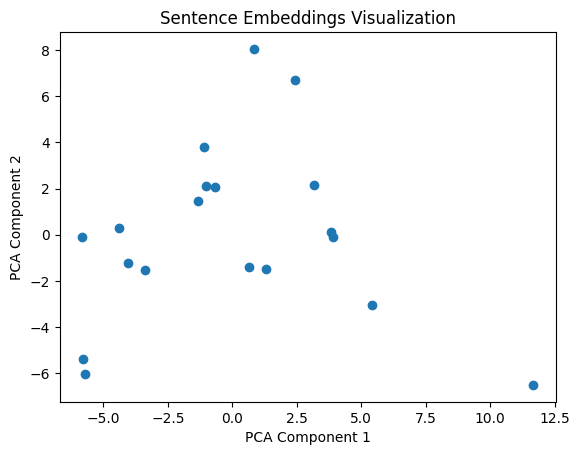

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 문장 임베딩 벡터의 차원을 축소하여 시각화
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# 시각화
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Sentence Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## t-SNE 이용 고차원 임베딩 시각화

- 고차원 데이터를 저차원으로 시각화 하는데 유용한 t-SNE 활용.
- 데이터 간 지역적 구조를 잘 드러내는 데 유용.

c:\Users\By the book\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\By the book\AppData\Local\Programs\Python\Python311\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


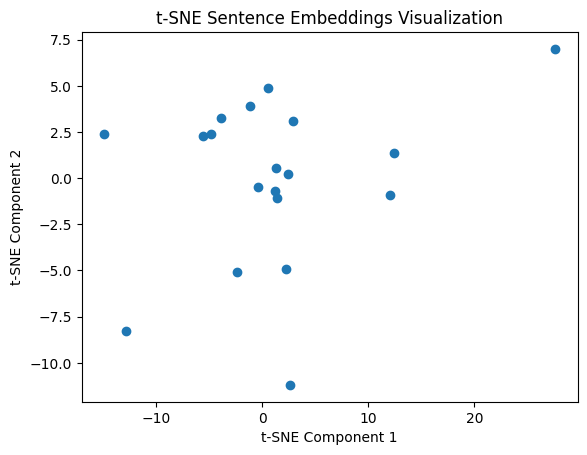

In [9]:
from sklearn.manifold import TSNE

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, perplexity=15, n_iter=250)
tsne_results = tsne.fit_transform(sentence_embeddings)

# 시각화
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Sentence Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()